<a href="https://colab.research.google.com/github/seunghyeon2776/98/blob/master/20200925_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTI_IMAGE_CLASSIFICATION**

4가지의 이미지 분류

기본적인 방법은 단일 이미지 분류와 같다. 대신, 다중 이미지 분류이기 때문에 카테고리의 변화가 있다.


In [1]:
!pip uninstall keras
!pip install Keras==2.2.4

!pip uninstall tensorflow
!pip install tensorflow==1.13.1

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 317kB 9.4MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalle

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### 폴더내 이미지 개수 확인하기 -validation



In [2]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/test/1. Cancer"))
file_count = len(files)

file_count

412

In [3]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/test/2. Precancer"))
file_count = len(files)

file_count

150

In [4]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/test/3. Extra"))
file_count = len(files)

file_count

262

In [5]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/test/4. Normal"))
file_count = len(files)

file_count

1137

### 데이터 부풀리기



*   rotation_range = 90: 
지정된 각도 범위내에서 임의로 원본이미지를 회전시킵니다. 단위는 도이며, 정수형입니다. 예를 들어 90이라면 0도에서 90도 사이에 임의의 각도로 회전시킵니다. 
*   width_shift_range = 0.1: 
지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동시킵니다. 수치는 전체 넓이의 비율(실수)로 나타냅니다. 예를 들어 0.1이고 전체 넓이가 100이면, 10픽셀 내외로 좌우 이동시킵니다

*   height_shift_range = 0.1: 
지정된 수직방향 이동 범위내에서 임의로 원본이미지를 이동시킵니다. 수치는 전체 높이의 비율(실수)로 나타냅니다. 예를 들어 0.1이고 전체 높이가 100이면, 10픽셀 내외로 상하 이동시킵니다.
*   shear_range = 0.5:
밀림 강도 범위내에서 임의로 원본이미지를 변형시킵니다. 수치는 시계반대방향으로 밀림 강도를 라디안으로 나타냅니다. 예를 들어 0.5이라면, 0.5 라이안내외로 시계반대방향으로 변형시킵니다.

*   zoom_range = 0.3:
지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소합니다. “1-수치”부터 “1+수치”사이 범위로 확대/축소를 합니다. 예를 들어 0.3이라면, 0.7배에서 1.3배 크기 변화를 시킵니다.
*   horizontal_flip = True:
수평방향으로 뒤집기를 합니다.
*   vertical_flip = True:
수직방향으로 뒤집기를 합니다.






In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img
import numpy as np

np.random.seed(3)

imageGenerator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range=[.2,.2],
                                    horizontal_flip=True)
                                    #validation_split=.2






/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
#데이터가 충분하면 나누기

'''trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                              target_size=(64,64),
                                              subset='training')

'''                                             

'''validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                                  target_size=(64,64),
                                                  subset='validation')'''

Found 0 images belonging to 3 classes.


"validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',\n                                                  target_size=(64,64),\n                                                  subset='validation')"

#### 1. Cancer

In [7]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path1 = "/content/drive/My Drive/CTRC/test/1. Cancer"

file_list = os.listdir(path1)

print ("file_list: {}".format(file_list))

file_list: ['can_1.jpg', 'can_2.jpg', 'can_3.jpg', 'can_4.jpg', 'can_5.jpg', 'can_6.jpg', 'can_8.jpg', 'can_9.jpg', 'can_10.jpg', 'can_11.jpg', 'can_12.jpg', 'can_13.jpg', 'can_14.jpg', 'can_15.jpg', 'can_15_1.jpg', 'can_16.jpg', 'can_17.jpg', 'can_17_1.jpg', 'can_18.jpg', 'can_19.jpg', 'can_20.jpg', 'can_21.jpg', 'can_22.jpg', 'can_22_1.jpg', 'can_23.jpg', 'can_24.jpg', 'can_25.jpg', 'can_26.jpg', 'can_27.jpg', 'can_28.jpg', 'can_30.jpg', 'can_29.jpg', 'can_31.jpg', 'can_32.jpg', 'can_32_1.jpg', 'can_33.jpg', 'can_34.jpg', 'can_35.jpg', 'can_36.jpg', 'can_37.jpg', 'can_37_1.jpg', 'can_38.jpg', 'can_39.jpg', 'can_40.jpg', 'can_40_1.jpg', 'can_41.jpg', 'can_42.jpg', 'can_43.jpg', 'can_44.jpg', 'can_51.jpg', 'can_52.jpg', 'can_53.jpg', 'can_53_1.jpg', 'can_53_2.jpg', 'can_55.jpg', 'can_54.jpg', 'can_57.jpg', 'can_56.jpg', 'can_58.jpg', 'can_59.jpg', 'can_59_1.jpg', 'can_59_2.jpg', 'can_63.jpg', 'can_60.jpg', 'can_60_1.jpg', 'can_62.jpg', 'can_61.jpg', 'can_61_1.jpg', 'can_45.jpg', 'can_4

In [8]:
n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

n=412
can_1.jpg


In [9]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/test/1. Cancer/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, 
                                     batch_size=1,
                                     save_to_dir='/content/drive/My Drive/CTRC/train/1. Cancer', 
                                     save_prefix='{}'.format(file_list[j]),
                                     save_format='jpg'):

        i += 1

        if i > 13: 

            break




'''
  for batch in imageGenerator.flow(x, batch_size=1,
                              save_to_dir=saveDir,
                              save_format='jpg'):
        i += 1'''

Using TensorFlow backend.


Found 16647 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


KeyboardInterrupt: ignored

#### 2. Precancer


In [ ]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path2 = "/content/drive/My Drive/CTRC/test/2. Precancer"

file_list = os.listdir(path2)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train/2. Precancer',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test/2. Precancer',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/test/2. Precancer/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/CTRC/train/2. Precancer',
                               save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i >35: 

            break

#### 3. Extra

In [ ]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path3 = "/content/drive/My Drive/CTRC/test/3. Extra"

file_list = os.listdir(path3)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train/3. Extra',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test/3. Extra',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/test/3. Extra/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/CTRC/train/3. Extra',
                               save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i > 20: 

            break

#### 4. Normal

In [ ]:
import os
import numpy as np
from PIL import Image
#path = 이미지resize할 file directory
path4 = "/content/drive/My Drive/CTRC/test/4. Normal"

file_list = os.listdir(path4)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train/4. Normal',
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test/4. Normal',
                                                  target_size=(64,64),
                                                  subset='validation')



for j in range(n):
    
    img = load_img('/content/drive/My Drive/CTRC/test/4. Normal/{}'.format(file_list[j]))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0

    for batch in imageGenerator.flow(x, batch_size=1, save_to_dir='/content/drive/My Drive/CTRC/train/4. Normal',
                               save_prefix='{}'.format(file_list[j]), save_format='jpg'):

        i += 1

        if i > 5: 

            break

### 폴더내 이미지 개수 확인하기 -train

In [ ]:
#코드 추가해서 확인하기

import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/4. Normal"))
file_count = len(files)

file_count

In [ ]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/3. Extra"))
file_count = len(files)

file_count

2879

In [ ]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/2. Precancer"))
file_count = len(files)

file_count

1797

In [ ]:
import os

path, dirs, files = next(os.walk("/content/drive/My Drive/CTRC/train/1. Cancer"))
file_count = len(files)

file_count

2471

# 이지우 설계


In [ ]:
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)


In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = '/content/drive/My Drive/CTRC/train'
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
xy = (X_train, X_test, y_train, y_test)
np.save('/content/drive/My Drive/CTRC/train/multi_image_data.npy', xy)

print("ok", len(y))


1. Cancer  파일 길이 :  2471
1. Cancer  :  /content/drive/My Drive/CTRC/train/1. Cancer/can_232.jpg_0_9397.jpg
1. Cancer  :  /content/drive/My Drive/CTRC/train/1. Cancer/can_349.jpg_0_240.jpg
1. Cancer  :  /content/drive/My Drive/CTRC/train/1. Cancer/can_132.jpg_0_9914.jpg
1. Cancer  :  /content/drive/My Drive/CTRC/train/1. Cancer/can_17.jpg_0_4612.jpg
2. Precancer  파일 길이 :  1797
2. Precancer  :  /content/drive/My Drive/CTRC/train/2. Precancer/precan_67.jpg_0_9867.jpg
2. Precancer  :  /content/drive/My Drive/CTRC/train/2. Precancer/precan_123.jpg_0_2662.jpg
2. Precancer  :  /content/drive/My Drive/CTRC/train/2. Precancer/precan_34.jpg_0_8027.jpg
3. Extra  파일 길이 :  2879
3. Extra  :  /content/drive/My Drive/CTRC/train/3. Extra/inf_160.jpg_0_2318.jpg
3. Extra  :  /content/drive/My Drive/CTRC/train/3. Extra/inf_229.jpg_0_7959.jpg
3. Extra  :  /content/drive/My Drive/CTRC/train/3. Extra/inf_107.jpg_0_1857.jpg
3. Extra  :  /content/drive/My Drive/CTRC/train/3. Extra/inf_8.jpg_0_4612.jpg
3. Extra

In [ ]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/drive/My Drive/CTRC/train/multi_image_data.npy', 
                                           allow_pickle=True)


#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

print(len(y_train))
print(len(X_train))
print(len(X_test))
print(len(y_test))
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


9777
9777
4191
4191
(9777, 64, 64, 3)
9777


## CNN 모델 만들기 (Conv2D 이용)

In [ ]:
#import keras.backend.tensorflow_backend as K
import tensorflow.keras.backend as K
import os, glob, numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt



model = Sequential()
model.add(Conv2D(32, (7,7), padding="same", input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
    # 3X3 크기의 컨볼루션 레이어를 32개의 필터수를 처음에 생성
    # 활성화 함수 relu
    # (64,64,3)의 튜플 값 가진다
    # Maxpooling2D를 통해 중요 값만 뽑아 작은 출력값 만든다

    
model.add(Conv2D(64, (5,5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))


model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#odel.add(Dropout(0.1))


model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.1))


model.add(Flatten()) 
    #CNN에서 컨볼루션 레이어나 맥스풀링을 거치면 주요 특징만 추출되어 학습됨
    
    #컨볼루션이나 맥스풀링은 주로 2차원을 다루지만
    #전결합층에 전달을 하기 위해서는 1차원으로 바꿔야하는데
    #이 때 Flatten사용
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.15))

    #model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



```
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])# 코드로 형식 지정됨
```


-손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.

-옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

-지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.



```
model.add(Dropout(0.25))
```


오버피팅을 피하기 위하여 25% 드롭아웃


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

드롭아웃 0.1두번 0.15두번

## model.fitting

**model.fit_generator**

- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정합니다.

- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 

- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 

- validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 

- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 

In [ ]:
validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test',
                                                  target_size=(64,64),
                                                  batch_size=3,
                                                   class_mode='categorical')

Found 1961 images belonging to 4 classes.


In [ ]:

history = model.fit(X_train, y_train, 
                    batch_size=300, epochs=100, 
                    validation_data=(X_test, y_test))


'''#Train
history=model.fit_generator(trainGen,
                    steps_per_epoch=300,
                    epochs=100,
                    validation_data=(X_test, y_test) 
                    validation_steps=60)'''


Instructions for updating:
Use tf.cast instead.
Train on 9777 samples, validate on 4191 samples
Epoch 1/100
9777/9777 [==============================] - 293s 30ms/step - loss: 1.3345 - acc: 0.4660 - val_loss: 1.2786 - val_acc: 0.4803
Epoch 2/100
9777/9777 [==============================] - 283s 29ms/step - loss: 1.2522 - acc: 0.4877 - val_loss: 1.2515 - val_acc: 0.4803
Epoch 3/100
9777/9777 [==============================] - 274s 28ms/step - loss: 1.1980 - acc: 0.4903 - val_loss: 1.1415 - val_acc: 0.4803
Epoch 4/100
9777/9777 [==============================] - 275s 28ms/step - loss: 1.1386 - acc: 0.5126 - val_loss: 1.0976 - val_acc: 0.5364
Epoch 5/100
9777/9777 [==============================] - 270s 28ms/step - loss: 1.1086 - acc: 0.5362 - val_loss: 1.0806 - val_acc: 0.5402
Epoch 6/100
9777/9777 [==============================] - 268s 27ms/step - loss: 1.0958 - acc: 0.5317 - val_loss: 1.0603 - val_acc: 0.4915
Epoch 7/100
9777/9777 [==============================] - 267s 27ms/step - lo

'#Train\nhistory=model.fit_generator(trainGen,\n                    steps_per_epoch=300,\n                    epochs=100,\n                    validation_data=(X_test, y_test) \n                    validation_steps=60)'

## 예측 만들기

In [ ]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

4191/4191 [==============================] - 36s 9ms/step
정확도 : 0.7938


In [ ]:

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test',
                                                  target_size=(64,64),
                                                  batch_size=3,
                                                   class_mode='categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
from sklearn.metrics import confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validationGen, 654)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validationGen.classes, y_pred))


Confusion Matrix
[[225  34  23 130]
 [ 85  17  11  37]
 [139  27  22  74]
 [597 138  84 318]]


In [ ]:
import sklearn.metrics as metrics

print(metrics.confusion_matrix(validationGen.classes, y_pred))

print(metrics.classification_report(validationGen.classes, y_pred))

[[225  34  23 130]
 [ 85  17  11  37]
 [139  27  22  74]
 [597 138  84 318]]
              precision    recall  f1-score   support

           0       0.22      0.55      0.31       412
           1       0.08      0.11      0.09       150
           2       0.16      0.08      0.11       262
           3       0.57      0.28      0.38      1137

    accuracy                           0.30      1961
   macro avg       0.25      0.26      0.22      1961
weighted avg       0.40      0.30      0.30      1961



In [ ]:

print('Classification Report')
target_names = ['cancer', 'precancer', 'extra','normal']
print(classification_report(validationGen.classes, y_pred, target_names=target_names))

Classification Report


NameError: ignored

In [ ]:
img_to_array(img)

array([[[148.,  22.,  46.],
        [148.,  22.,  46.],
        [149.,  23.,  47.],
        ...,
        [210., 116., 168.],
        [234., 142., 194.],
        [233., 140., 193.]],

       [[147.,  23.,  47.],
        [148.,  24.,  48.],
        [148.,  24.,  48.],
        ...,
        [214., 120., 173.],
        [235., 142., 195.],
        [230., 138., 192.]],

       [[144.,  21.,  45.],
        [145.,  21.,  45.],
        [145.,  22.,  46.],
        ...,
        [218., 122., 178.],
        [235., 141., 197.],
        [228., 136., 192.]],

       ...,

       [[ 80.,  24.,  33.],
        [ 82.,  25.,  34.],
        [ 81.,  24.,  33.],
        ...,
        [102.,  14.,  29.],
        [104.,  16.,  30.],
        [106.,  18.,  30.]],

       [[ 81.,  25.,  34.],
        [ 83.,  26.,  35.],
        [ 80.,  24.,  32.],
        ...,
        [104.,  16.,  30.],
        [107.,  19.,  33.],
        [107.,  19.,  32.]],

       [[ 82.,  25.,  34.],
        [ 83.,  26.,  35.],
        [ 81.,  

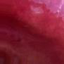

In [ ]:
img

TypeError: ignored

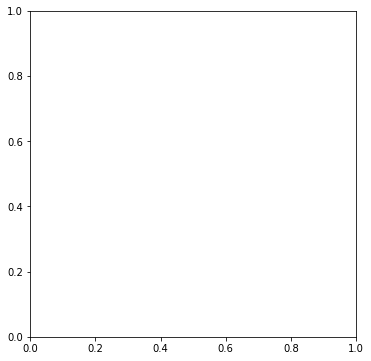

In [ ]:

title = 'test'
cmap=plt.cm.Greens
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(4), ("1. Cancer","2. Precancer","3. Extra","4. Normal"))
plt.yticks(np.arange(4), ("1. Cancer","2. Precancer","3. Extra","4. Normal"))

fmt = 'd' 
thresh = 1
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 ha="center", va="center", 
                 color="white" if confusion_matrix[i, j] > thresh else "black")  #horizontalalignment

## 모델을 이용해 새로운 이미지를 분류하기

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/My Drive/CTRC/train/multi_img_data/imgs_others_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3


#테스트할 이미지를 변환할 소스
X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
X = X.reshape(X.shape[0], 64,64,3)
#model = load_model( './model/multi_img_classification.model')


#해당 이미지 predict
prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

In [ ]:
#저장된 모델구조와 모델 가중치를 불러옵니다.

from keras.models import load_model

#model=load_model('project.h5')



trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                                  target_size=(64,64),
                                                  batch_size=3,
                                                   class_mode='categorical')



print("--Predict--")

output=model.predict_generator(trainGen,steps=220)

np.set_printoptions(formatter={'float':lambda x:"{0:0.3f}".format(x)})

print(trainGen.class_indices)

print(output)


Found 11762 images belonging to 4 classes.
--Predict--
{'1. Cancer': 0, '2. Precancer': 1, '3. Extra': 2, '4. Normal': 3}
[[0.053 0.111 0.344 0.492]
 [0.003 0.091 0.733 0.173]
 [0.000 0.000 0.000 1.000]
 ...
 [0.409 0.271 0.301 0.019]
 [0.697 0.233 0.070 0.000]
 [0.000 0.000 0.000 1.000]]


In [ ]:
testGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test',
                                                  target_size=(64,64),
                                                  batch_size=3,
                                                   class_mode='categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['1. Cancer', '2. Precancer','3. Extra','4. Normal']

imgs = testGen.next()
arr = imgs[0][0]


img = array_to_img(arr).resize((128, 128))

## 성능 그래프 그리기

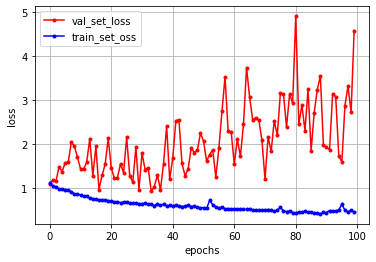

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

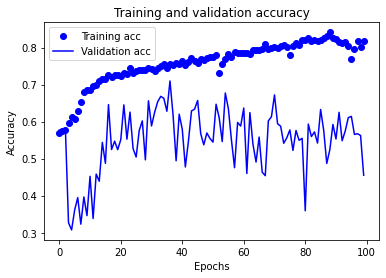

In [ ]:
plt.clf() # 그래프를 초기화합니다.
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(x_len, acc, 'bo', label='Training acc')
plt.plot(x_len, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import sklearn.metrics as metrics



y = trainGen 

p = output



accuracy = np.mean(np.equal(y,p))

right = np.sum(y * p == 1)

precision = right / np.sum(p)

recall = right / np.sum(y)

f1 = 2 * precision*recall/(precision+recall)



print('accuracy',accuracy)

print('precision', precision)

print('recall', recall)

print('f1', f1)



# sklearn 을 이용하면 전부 계산해준다.

print('accuracy', metrics.accuracy_score(y,p) )

print('precision', metrics.precision_score(y,p) )

print('recall', metrics.recall_score(y,p) )

print('f1', metrics.f1_score(y,p) )


KeyboardInterrupt: ignored

## 혼동 행렬 그리기

In [ ]:
testGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/test',
                                                  target_size=(64,64),
                                                  batch_size=3,
                                                   class_mode='categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
output2=model.predict_generator(testGen,steps=3)


In [ ]:

'''from sklearn.metrics import confusion_matrix

y_test = [2, 0, 2, 2, 0, 1] #실제값
y_pred = [0, 0, 2, 2, 0, 2] #예측값

conf_matrix = confusion_matrix(y_test, y_pred) #혼동 행렬
print(conf_matrix)'''

'''
from sklearn.metrics import confusion_matrix

y_test = testGen #내 코드에서 수정
y_pred = output2


conf_matrix = confusion_matrix(trainGen, output) 
print(conf_matrix)'''

'\nfrom sklearn.metrics import confusion_matrix\n\ny_test = testGen #내 코드에서 수정\ny_pred = output2\n\n\nconf_matrix = confusion_matrix(trainGen, output) \nprint(conf_matrix)'

In [ ]:
'''
title = 'test'
cmap=plt.cm.Greens
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(4), ("1. Cancer","2. Precancer","3. Extra","4. Normal"))
plt.yticks(np.arange(4), ("1. Cancer","2. Precancer","3. Extra","4. Normal"))

fmt = 'd' 
thresh = 1
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha="center", va="center", 
                 color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment'''

'\ntitle = \'test\'\ncmap=plt.cm.Greens\nplt.figure(figsize=(6, 6))\nplt.imshow(conf_matrix, interpolation=\'nearest\', cmap=cmap)  # , cmap=plt.cm.Greens\nplt.title(title, size=12)\nplt.colorbar(fraction=0.05, pad=0.05)\ntick_marks = np.arange(3, 3)\nplt.xticks(np.arange(4), ("1. Cancer","2. Precancer","3. Extra","4. Normal"))\nplt.yticks(np.arange(4), ("1. Cancer","2. Precancer","3. Extra","4. Normal"))\n\nfmt = \'d\' \nthresh = 1\nfor i in range(conf_matrix.shape[0]):\n    for j in range(conf_matrix.shape[1]):\n        plt.text(j, i, format(conf_matrix[i, j], fmt),\n                 ha="center", va="center", \n                 color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment'

In [ ]:
#Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(nb_classes))
    plt.xticks(tick_marks, nb_classes, rotation=45)
    plt.yticks(tick_marks, nb_classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
Y_pred = model.predict(X_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(trainGen,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))
sns.heatmap(confusion_mtx, annot=True, fmt='d')


# 한승현 설계

In [ ]:
import os
import glob
import numpy as np
import cv2
from sklearn.utils import shuffle

def load_train(train_path, image_size, classes):
    images = []
    labels = []
    ids = []
    cls = []

    print('Reading training images')
    for fld in classes:
        index = classes.index(fld)
        print('Loading {} files (Index: {})'.format(fld, index))
        path = os.path.join(train_path, fld, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl)
            image = cv2.resize(image, (image_size, image_size), cv2.INTER_LINEAR)
            images.append(image)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels.append(label)
            flbase = os.path.basename(fl)
            ids.append(flbase)
            cls.append(fld)
    images = np.array(images)
    labels = np.array(labels)
    ids = np.array(ids)
    cls = np.array(cls)
  

    return images, labels, ids, cls


def load_test(test_path, image_size):
    path = os.path.join(test_path, '*g')
    files = sorted(glob.glob(path))

    X_test = []
    X_test_id = []
    print("Reading test images")
    for fl in files:
        
        img = cv2.imread(fl)
        img = cv2.resize(img, (image_size, image_size), cv2.INTER_LINEAR)
        X_test.append(img)
        X_test_id.append(flbase)
        flbase = os.path.basename(fl)

    X_test = np.array(X_test, dtype=np.uint8)
    X_test = X_test.astype('float32')
    X_test = X_test / 255
    X_test_id = np.array(X_test_id)

    return X_test, X_test_id


class DataSet(object):

    def __init__(self, images, labels, ids, cls):
        """Construct a DataSet. one_hot arg is used only if fake_data is true."""

        self._num_examples = images.shape[0]

        # Convert shape from [num examples, rows, columns, depth]
        # to [num examples, rows*columns] (assuming depth == 1)
        # Convert from [0, 255] -> [0.0, 1.0].

        images = images.astype(np.float32)
        images = np.multiply(images, 1.0 / 255.0)

        self._images = images
        self._labels = labels
        self._ids = ids
        self._cls = cls
        self._epochs_completed = 0
        self._index_in_epoch = 0

    @property
    def images(self):
        return self._images

    @property
    def labels(self):
        return self._labels

    @property
    def ids(self):
        return self._ids

    @property
    def cls(self):
        return self._cls

    @property
    def num_examples(self):
        return self._num_examples

    @property
    def epochs_completed(self):
        return self._epochs_completed

    def next_batch(self, batch_size):
        """Return the next `batch_size` examples from this data set."""
        start = self._index_in_epoch
        self._index_in_epoch += batch_size

        if self._index_in_epoch > self._num_examples:
            # Finished epoch
            self._epochs_completed += 1

            # # Shuffle the data (maybe)
            # perm = np.arange(self._num_examples)
            # np.random.shuffle(perm)
            # self._images = self._images[perm]
            # self._labels = self._labels[perm]
            # Start next epoch

            start = 0
            self._index_in_epoch = batch_size
            assert batch_size <= self._num_examples
        end = self._index_in_epoch

        return self._images[start:end], self._labels[start:end], self._ids[start:end], self._cls[start:end]


def read_train_sets(train_path, image_size, classes, validation_size=0):
    class DataSets(object):
        pass

    data_sets = DataSets()

    images, labels, ids, cls = load_train(train_path, image_size, classes)
    images, labels, ids, cls = shuffle(images, labels, ids, cls)  # shuffle the data

    if isinstance(validation_size, float):
        validation_size = int(validation_size * images.shape[0])

    validation_images = images[:validation_size]
    validation_labels = labels[:validation_size]
    validation_ids = ids[:validation_size]
    validation_cls = cls[:validation_size]

    train_images = images[validation_size:]
    train_labels = labels[validation_size:]
    train_ids = ids[validation_size:]
    train_cls = cls[validation_size:]

    data_sets.train = DataSet(train_images, train_labels, train_ids, train_cls)
    data_sets.valid = DataSet(validation_images, validation_labels, validation_ids, validation_cls)

    return data_sets


def read_test_sets(test_path, image_size):
    images, ids = load_test(test_path, image_size)
    return images, ids

In [ ]:
import time
import math
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import cv2
import dataset
import os
import keras

from sklearn.metrics import confusion_matrix
from datetime import timedelta
import seaborn as sn

%matplotlib inline

tf.disable_v2_behavior()


filter_size1 = 5
num_filters1 = 16

filter_size2 = 5
num_filters2 = 16

filter_size3 = 5
num_filters3 = 32

filter_size4 = 5
num_filters4 = 32

filter_size5 = 5
num_filters5 = 32

filter_size6 = 7
num_filters6 = 64

filter_size7 = 7
num_filters7 = 64

# Fully-connected layer.
fc_size = 256             # Number of neurons in fully-connected layer.

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 3

# image dimensions (only squares for now)
img_size = 128

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# class info
classes = ['1.Cancer', '2.Precancer', '3.Inflammatory', '4.Normal']
num_classes = len(classes)

# batch size
batch_size = 32

# validation split
validation_size = .3

# how long to wait after validation loss stops improving before terminating training
early_stopping = None  # use None if you don't want to implement early stoping

In [ ]:
train_path = '/content/drive/My Drive/train'
test_path = '/content/drive/My Drive/test'
checkpoint_dir = '/content/drive/My Drive/model'

data = read_train_sets(train_path, img_size, classes, validation_size=validation_size)
test_images, test_ids = read_test_sets(test_path, img_size)


print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(test_images)))
print("- Validation-set:\t{}".format(len(data.valid.labels)))

In [ ]:
def plot_images(images, cls_true, cls_pred=None):
    
    if len(images) == 0:
        print("no images to show")
        return 
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9))
        
    if cls_pred is not None:
        images, cls_true, cls_pred  = zip(*[(images[i], cls_true[i], cls_pred[i]) for i in random_indices])
    else:
        images, cls_true  = zip(*[(images[i], cls_true[i]) for i in random_indices])

    print(cls_pred)
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((img_size, img_size, num_channels)))

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

images, cls_true  = data.train.images, data.train.cls

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [ ]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def new_conv_layer(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=True): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)


    return layer, weights

def new_conv_layer_drop(input,              
                   num_input_channels, 
                   filter_size,       
                   num_filters,       
                   use_pooling=True): 

    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape=shape)

    biases = new_biases(length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer += biases

    if use_pooling:

        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    layer = tf.nn.relu(layer)
    layer = tf.nn.dropout(layer, keep_prob=keep_prob)
    
    return layer, weights

def flatten_layer(layer):

    layer_shape = layer.get_shape()

    num_features = layer_shape[1:8].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])

    return layer_flat, num_features

  
def new_fc_layer(input,        
                 num_inputs,    
                 num_outputs,  
                 use_relu=True):

    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

x = tf.compat.v1.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

y_true = tf.compat.v1.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

y_true_cls = tf.argmax(y_true, axis=1)

keep_prob = tf.compat.v1.placeholder(tf.float32)

In [ ]:
layer_conv1, weights_conv1 = \
    new_conv_layer_drop(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)
     

layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)
    
layer_conv3, weights_conv3 = \
    new_conv_layer_drop(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True)
    
layer_conv4, weights_conv4 = \
    new_conv_layer(input=layer_conv3,
                   num_input_channels=num_filters3,
                   filter_size=filter_size4,
                   num_filters=num_filters4,
                   use_pooling=True)
    
layer_conv5, weights_conv5 = \
    new_conv_layer_drop(input=layer_conv4,
                   num_input_channels=num_filters4,
                   filter_size=filter_size5,
                   num_filters=num_filters5,
                   use_pooling=True)
    
layer_conv6, weights_conv6 = \
    new_conv_layer(input=layer_conv5,
                   num_input_channels=num_filters5,
                   filter_size=filter_size6,
                   num_filters=num_filters6,
                   use_pooling=True)
    
layer_conv7, weights_conv7 = \
    new_conv_layer_drop(input=layer_conv6,
                   num_input_channels=num_filters6,
                   filter_size=filter_size7,
                   num_filters=num_filters7,
                   use_pooling=True)
    
layer_flat, num_features = flatten_layer(layer_conv7)

layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=128,
                         use_relu=False)

layer_fc3 = new_fc_layer(input=layer_fc2,
                         num_inputs=128,
                         num_outputs=64,
                         use_relu=False)

layer_fc4 = new_fc_layer(input=layer_fc3,
                         num_inputs=64,
                         num_outputs=32,
                         use_relu=False)

layer_fc5 = new_fc_layer(input=layer_fc4,
                         num_inputs=32,
                         num_outputs=16,
                         use_relu=False)

layer_fc6 = new_fc_layer(input=layer_fc5,
                         num_inputs=16,
                         num_outputs=num_classes,                        
                         use_relu=False)

y_pred = tf.nn.softmax(layer_fc6)

y_pred_cls = tf.argmax(y_pred, axis=1)

loss_func = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_fc6, labels=y_true)

cost = tf.reduce_mean(loss_func)


optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
session = tf.Session()

session.run(tf.global_variables_initializer())

train_batch_size = batch_size

def print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss):
    acc = session.run(accuracy, feed_dict=feed_dict_train)
    val_acc = session.run(accuracy, feed_dict=feed_dict_validate)
    msg = "Epoch {0} --- Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}, Validation Loss: {3:.3f}"
    print(msg.format(epoch + 1, acc, val_acc, val_loss))
    print(print_validation_accuracy(show_confusion_matrix=True))

total_iterations = 0

def optimize(num_iterations):
    global total_iterations

    start_time = time.time()
    
    best_val_loss = float("inf")
    patience = 0

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        

        x_batch, y_true_batch, _, cls_batch = data.train.next_batch(train_batch_size)
        x_valid_batch, y_valid_batch, _, valid_cls_batch = data.valid.next_batch(train_batch_size)

        x_batch = x_batch.reshape(train_batch_size, img_size_flat)
        x_valid_batch = x_valid_batch.reshape(train_batch_size, img_size_flat)

        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch, keep_prob: 0.7}
        
        feed_dict_validate = {x: x_valid_batch,
                              y_true: y_valid_batch, keep_prob : 0.7}

        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i % int(data.train.num_examples/batch_size) == 0: 
            val_loss = session.run(cost, feed_dict=feed_dict_validate)
            epoch = int(i / int(data.train.num_examples/batch_size))

            print_progress(epoch, feed_dict_train, feed_dict_validate, val_loss)
            
            if early_stopping:    
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience = 0
                else:
                    patience += 1

                if patience == early_stopping:
                    break



    total_iterations += num_iterations

    end_time = time.time()

    time_dif = end_time - start_time

    print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

def print_validation_accuracy(show_example_errors=False, show_confusion_matrix=False):

    num_test = len(data.valid.images)

    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    i = 0

    while i < num_test:
 
        j = min(i + batch_size, num_test)

        images = data.valid.images[i:j, :].reshape(-1, img_size_flat)
        
        labels = data.valid.labels[i:j, :]

        feed_dict = {x: images, y_true: labels, keep_prob: 0.7}

        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j


    cls_true = np.array(data.valid.cls)
    cls_pred = np.array([classes[x] for x in cls_pred]) 

    correct = (cls_true == cls_pred)

    correct_sum = correct.sum()

    acc = float(correct_sum) / num_test

    msg = "Accuracy on Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

def plot_example_errors(cls_pred, correct):

    incorrect = (correct == False)

    images = data.valid.images[incorrect]

    cls_pred = cls_pred[incorrect]

    cls_true = data.valid.cls[incorrect]

    plot_images(images=images, cls_true=cls_true, cls_pred=cls_pred)


def plot_confusion_matrix(cls_pred):
    
    cls_true = data.valid.cls

    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    print(cm)
    
    plt.matshow(cm, cmap=plt.cm.Wistia_r)

    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))

    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(0,4):
      for j in range(0,4):
        plt.text(j,i,str(cm[i][j]))
    plt.show()

    print("1.Cancer의 정밀도 : ", (cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]))*100, "%")
    print("1.Cancer의 재현율 : ", (cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]))*100, "%")
    print("2.Precancer의 정밀도 : ", (cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]))*100, "%")
    print("2.Precancer의 재현율 : ", (cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]))*100, "%")
    print("3.Inflammatory의 정밀도 : ", (cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]))*100, "%")
    print("3.Inflammatory의 재현율 : ", (cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]))*100, "%")
    print("4.Normal의 정밀도 : ", (cm[3,3]/(cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]))*100, "%")
    print("4.Normal의 재현율 : ", (cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]))*100, "%")

In [ ]:
optimize(num_iterations=1000000)


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cls_pred):
    
    cls_true = data.valid.cls

    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    print(cm)
    
    plt.matshow(cm, cmap=plt.cm.Wistia_r)

    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))

    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(0,4):
      for j in range(0,4):
        plt.text(j,i,str(cm[i][j]))
    plt.show()

    print("1.Cancer의 정밀도 : ", round((cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]))*100,2), "%")
    print("1.Cancer의 재현율 : ", round((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]))*100,2), "%")
    print("2.Precancer의 정밀도 : ", round((cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]))*100,2), "%")
    print("2.Precancer의 재현율 : ", round((cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]))*100,2), "%")
    print("3.Inflammatory의 정밀도 : ", round((cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]))*100,2), "%")
    print("3.Inflammatory의 재현율 : ", round((cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]))*100,2), "%")
    print("4.Normal의 정밀도 : ", round((cm[3,3]/(cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]))*100,2), "%")
    print("4.Normal의 재현율 : ", round((cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]))*100,2), "%")

In [ ]:
print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\ml\\molecular_activity.csv')

properties = list(df.columns.values)
properties.remove('Activity')

X = df[properties]
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
	keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_val, y_val))

## 테스트

print_validation_accuracy(show_example_errors=True, show_confusion_matrix=True)

In [ ]:
test_cancer = cv2.imread('/content/drive/My Drive/train/Cancer/can_129.jpg')
test_cancer = cv2.resize(test_cancer, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_cancer = plt.imshow(test_cancer.reshape(img_size, img_size, num_channels))

def sample_prediction(test_im):
    
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[3, 2, 1, 0]])
    }

    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print("Predicted class for test_cancer: {}".format(sample_prediction(test_cancer)))

In [ ]:
test_inflammatory = cv2.imread('/content/drive/My Drive/train/Inflammatory/inf_139.jpg')
test_inflammatory = cv2.resize(test_inflammatory, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_inflammatory = plt.imshow(test_inflammatory.reshape(img_size, img_size, num_channels))

def sample_prediction(test_im):
    
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[3, 2, 1, 0]])
    }

    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print("Predicted class for test_inflammatory: {}".format(sample_prediction(test_inflammatory)))

In [ ]:
test_normal = cv2.imread('/content/drive/My Drive/train/Normal/nor_15.jpg')
test_normal = cv2.resize(test_normal, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_normal = plt.imshow(test_normal.reshape(img_size, img_size, num_channels))

def sample_prediction(test_im):
    
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[3, 2, 1, 0]])
    }

    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print("Predicted class for test_normal: {}".format(sample_prediction(test_normal)))

In [ ]:
test_precancer = cv2.imread('/content/drive/My Drive/train/Precancer/precan_29.jpg')
test_precancer = cv2.resize(test_precancer, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_precancer = plt.imshow(test_precancer.reshape(img_size, img_size, num_channels))

def sample_prediction(test_im):
    
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[3, 2, 1, 0]])
    }

    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print("Predicted class for test_precancer: {}".format(sample_prediction(test_precancer)))

In [ ]:
test_cancer = cv2.imread('/content/drive/My Drive/train/1.Cancer/can_163.jpg')
test_cancer = cv2.resize(test_cancer, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_cancer = plt.imshow(test_cancer.reshape(img_size, img_size, num_channels))

In [ ]:
test_precancer = cv2.imread('/content/drive/My Drive/train/2.Precancer/precan_125.jpg')
test_precancer = cv2.resize(test_precancer, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_precancer = plt.imshow(test_precancer.reshape(img_size, img_size, num_channels))

In [ ]:
test_inflammatory = cv2.imread('/content/drive/My Drive/train/3.Inflammatory/inf_146.jpg')
test_inflammatory = cv2.resize(test_inflammatory, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_inflammatory = plt.imshow(test_inflammatory.reshape(img_size, img_size, num_channels))

In [ ]:
test_normal = cv2.imread('/content/drive/My Drive/train/4.Normal/nor_135.jpg')
test_normal = cv2.resize(test_normal, (img_size, img_size), cv2.INTER_LINEAR) / 255

preview_normal = plt.imshow(test_normal.reshape(img_size, img_size, num_channels))

In [ ]:
def sample_prediction(test_im):
    
    feed_dict_test = {
        x: test_im.reshape(1, img_size_flat),
        y_true: np.array([[3, 2, 1, 0]])
    }

    test_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    return classes[test_pred[0]]

print("Predicted class for test_cancer: {}".format(sample_prediction(test_cancer)))
print("Predicted class for test_precancer: {}".format(sample_prediction(test_precancer)))
print("Predicted class for test_inflammatory: {}".format(sample_prediction(test_inflammatory)))
print("Predicted class for test_normal: {}".format(sample_prediction(test_normal)))

In [ ]:
def plot_conv_weights(weights, input_channel=0):
    
    w = session.run(weights)

    w_min = np.min(w)
    w_max = np.max(w)

    num_filters = w.shape[3]

    num_grids = math.ceil(math.sqrt(num_filters))
    
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i<num_filters:

            img = w[:, :, input_channel, i]

            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

def plot_conv_layer(layer, image):
    
    image = image.reshape(img_size_flat)

    feed_dict = {x: [image]}

    values = session.run(layer, feed_dict=feed_dict)

    num_filters = values.shape[3]

    num_grids = math.ceil(math.sqrt(num_filters))
    
    fig, axes = plt.subplots(num_grids, num_grids)

    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = values[0, :, :, i]

            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

def plot_image(image):
    plt.imshow(image.reshape(img_size, img_size, num_channels),
               interpolation='nearest')
    plt.show()

In [ ]:
def plot_image(image):
    plt.imshow(image.reshape(img_size, img_size, num_channels),
               interpolation='nearest')
    plt.show()

image1 = test_images
plot_image(image1)

In [ ]:
image2 = test_images[13]
plot_image(image2)

In [ ]:
image3 = test_images[13]
plot_image(image3)

In [ ]:
image4 = test_images[13]
plot_image(image4)

In [ ]:
plot_conv_weights(weights=weights_conv1)

In [ ]:
plot_conv_layer(layer=layer_conv1, image=image1)

In [ ]:
plot_conv_layer(layer=layer_conv1, image=image2)

In [ ]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

In [ ]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

In [ ]:
plot_conv_layer(layer=layer_conv2, image=image1)

In [ ]:
plot_conv_layer(layer=layer_conv2, image=image2)

In [ ]:
session.close()

# 클러스터링

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

In [ ]:
print("클러스터 레이블 확인 : \n {}".format(kmeans.y_train))
# 클러스터 레이블 확인 :

In [ ]:
print(np.array_equal(kmeans.labels_,kmeans.predict(X)))